# Life Expectancy By Country

## Overview
Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

## Project Goals
In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.

Some questions that are posed:
- what is the distribution of life expectancy?
- what are the quantiles of life expectancy?
- IQR of life expectancy?

## Actions

- analyze data;
- clean up the datasets;
- visualize the data using histograms;
- seek to answer the questions;
- making conclusions based on the analysis.

## Data

Оne data set is submitted for the project.

country_data - contains information about different countries, including their life expectancy and GDP.

## Analysis

The analysis contains basic techniques and calculations related to the most common characteristics of data sets. Exactly:
- Distribution of life expectancy
- Quantiles of life expectancy
- IQR of life expectancy
- Maximum and minimum values of life expectancy

In [47]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('max_colwidth', 0)

In [48]:
# load and view data
df = pd.read_csv("country_data.csv")
df.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19,340.02
1,Albania,75.16,2119.73
2,Algeria,73.62,2847.85
3,Angola,49.02,1975.14
4,Antigua and Barbuda,75.06,9759.31


There are 3 columns in the dataset: 'Country', 'Life Expectancy', and 'GDP'.
 - The `Country` column contains the names of the countries.
 - The `Life Expectancy` column contains the average life expectancy of the people in each country.
 - The `GDP` column contains the Gross Domestic Product (GDP) per capita for each country.

In [49]:
# clean and rename columns
df.columns = df.columns.str.lower()
df.rename(columns={'life expectancy': 'life_expectancy'}, inplace=True)

In [50]:
# looking for duplicates
df[df.duplicated(subset=['country'])]

,country,life_expectancy,gdp


In [51]:
# create a life expectancy series
life_expectancy = df['life_expectancy']
life_expectancy.head()

0   58.19
1   75.16
2   73.62
3   49.02
4   75.06
Name: life_expectancy, dtype: float64

## Find the Quantiles

Use NumPy functions to find the quartiles of `life_expectancy`.

In [52]:
# find the quartiles

life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75]).tolist()
life_expectancy_quartiles

[62.325, 72.525, 75.44218749999999]

By looking at those three values we can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together — a quarter of the data is between 72.5 years and 75.4 years.

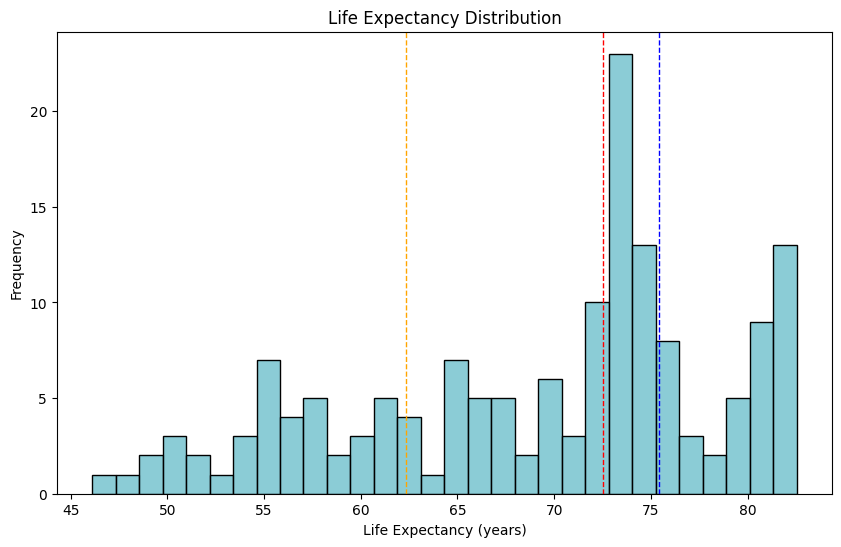

In [80]:
# making a histogram
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy, bins=30, color='#64BBC9')
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.axvline(life_expectancy_quartiles[0], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(life_expectancy_quartiles[1], color='red', linestyle='dashed', linewidth=1)
plt.axvline(life_expectancy_quartiles[2], color='blue', linestyle='dashed', linewidth=1)
plt.show()

The narrowest quartile is between 72 and 75 years. We can see this represented in the histogram through the larger spike of data around 75 years.

If the country has a life expectancy of 70 years, it falls to the second quartile of the data.

## Splitting the Data by GDP

GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.

Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.

In [54]:
# create GDP series
gdp = df['gdp']

In [55]:
# calculate median GDP
median_gdp = np.quantile(gdp, 0.5)  # or gdp.median()
median_gdp

2938.0781155

In [60]:
# split the gdp data into low and high GDP countries
low_gdp = df.loc[df['gdp'] <= median_gdp, :]
high_gdp = df.loc[df['gdp'] > median_gdp, :]

low_gdp.head()


,country,life_expectancy,gdp
0,Afghanistan,58.19,340.02
1,Albania,75.16,2119.73
2,Algeria,73.62,2847.85
3,Angola,49.02,1975.14
6,Armenia,73.40,1999.99


In [65]:
# find the quartiles of of the life_expectancy
low_gdp_quartiles = np.quantile(low_gdp['life_expectancy'], [0.25, 0.5, 0.75])
low_gdp_quartiles

array([56.3375 , 64.34375, 71.7375 ])

In [67]:
high_gdp_quartiles = np.quantile(high_gdp['life_expectancy'], [0.25, 0.5, 0.75])
high_gdp_quartiles

array([72.965625, 75.15625 , 80.521875])

## Histogram and Conclusions

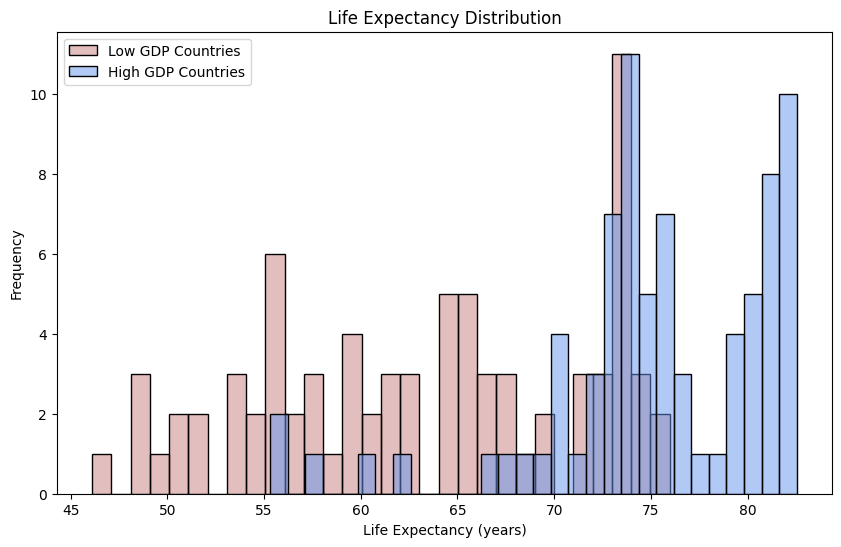

In [75]:
# plotting the histograms

plt.figure(figsize=(10, 6))
sns.histplot(low_gdp['life_expectancy'], bins=30, color='#A52A2A', alpha=0.3)
sns.histplot(high_gdp['life_expectancy'], bins=30, color='#6495ED', alpha=0.5)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.legend(['Low GDP Countries', 'High GDP Countries'])
plt.show()

### Conclusions

We can now truly see the impact GDP has on life expectancy.

Imagine, that if a country that has a life expectancy of 70 years, it falls to:
- quartile 3 at low GDP countries;
- quartile 1 at high GDP countries.

